# Tutorial 09 Exploration A Clustering

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans # clustering
from sklearn.metrics import silhouette_score # clustering

# 1. Create data frame

In [2]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv', index_col=0)
print(data.head())

exit_rate = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageExitRate.csv', index_col=0)
page_revenue = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageRevenue.csv', index_col=0)
page_size = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageSize.csv', index_col=0)
page_speed = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageSpeed.csv', index_col=0)
page_viewing_time = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageViewingTime.csv', index_col=0)

summary_data = pd.DataFrame(index=data.columns) # data frame creation
summary_data['Exit'] = exit_rate.values
summary_data['Revenue'] = page_revenue.values
summary_data['Hits'] = data.sum().values
summary_data['Size'] = page_size.values
summary_data['Download'] = page_speed.values
summary_data['Viewing'] = page_viewing_time.values
print(summary_data.head())

             001  002  003  004  005  006  007  008  009  010  ...  158  159  \
Date                                                           ...             
2019-01-01  1062   33   67   42    0    4    0    0    1   69  ...    0    0   
2019-01-02   976   41   72   19    2    0    0   14    1   62  ...    5    0   
2019-01-03   956   27   71   28    4    6   11    0    0   64  ...    0    0   
2019-01-04   976   30   57   29    0    0    3    0    2   52  ...    0    2   
2019-01-05   956   45   65   27    4    1    0    0    0   55  ...   12    0   

            160  161  162  163  164  165  166  167  
Date                                                
2019-01-01    4    0   10    2    2    2    0    0  
2019-01-02    0    7    0    0    0    0    1    3  
2019-01-03    0    0    6    0    0    3    0    0  
2019-01-04    0    0    0    0    0    0    0    7  
2019-01-05    0    4    0    0    0    0    5    2  

[5 rows x 167 columns]
          Exit      Revenue    Hits        S

# 2. elbow and silhouette methods to estimate the optimal number of custers

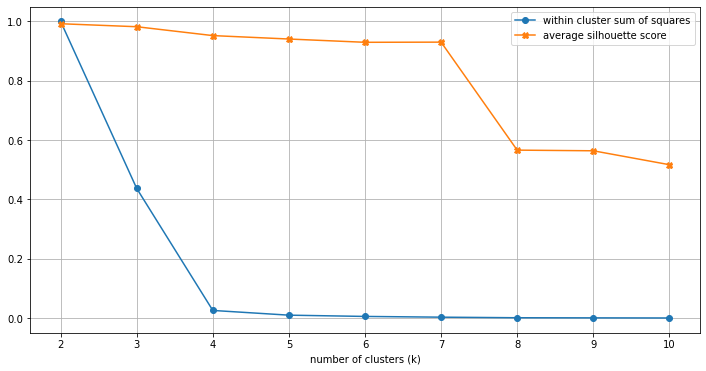

In [7]:
selected = summary_data.columns
min_k = 2
max_k = 10
k_values = range(min_k, max_k + 1)
WCSS = []
silhouette = []
for k in k_values:
    k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
    labels = k_means.fit_predict(summary_data[selected])
    WCSS = np.append(WCSS, k_means.inertia_)
    silhouette.append(silhouette_score(summary_data[selected], labels))
WCSS = WCSS / max(WCSS)

plt.figure(figsize=(12, 6))
plt.plot(k_values, WCSS, marker='o', label='within cluster sum of squares')
plt.plot(k_values, silhouette, marker='X', label='average silhouette score')
plt.xlabel('number of clusters (k)')
plt.legend()
plt.grid()
plt.show()

### 3. k-means algorithm with k = 2, cluster the summary data

In [8]:
## Function to draw plots,
# Inputs:
# xlabel - string : column to use for the x axis 
# ylabel - string : column to use for the y axis
# k - int - number of clusters to create

# Outputs:
# scatter plot with x number of clusters 

def draw_scatter_cluster(xlabel, ylabel, K):
  k = K
  selected = summary_data.columns
  k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
  summary_data['label'] = k_means.fit_predict(summary_data[selected])

  clusters = []
  for c in range(k):
      clusters.append(summary_data[summary_data['label'] == c])

  plt.figure(figsize=(8, 8))
  for c in range(k):
      plt.scatter(clusters[c][xlabel], clusters[c][ylabel], s=100)
  #for i, name in enumerate(summary_data.index):
  #    plt.annotate(name, (summary_data['Revenue'][i] + 500, summary_data['Hits'][i]))
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

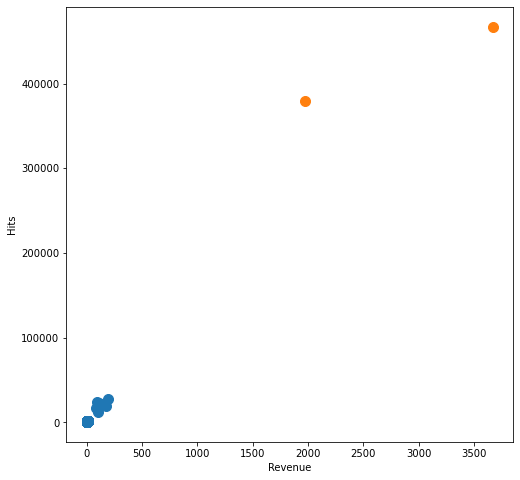

In [9]:

draw_scatter_cluster('Revenue', 'Hits', 2)


# 4. Cluster scatter plots viewing time vs page size

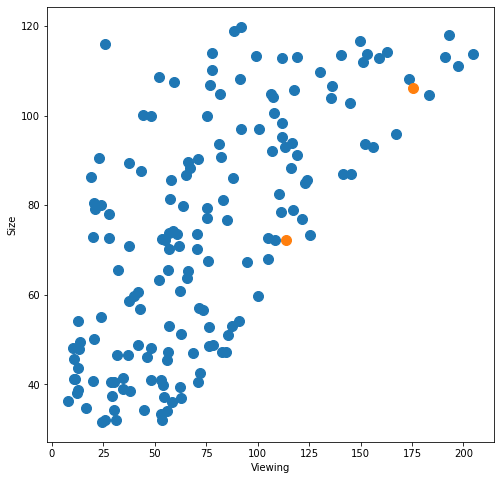

In [10]:

draw_scatter_cluster('Viewing', 'Size', 2)


# 5. k-means algorithm with k = 4, cluster the summary data

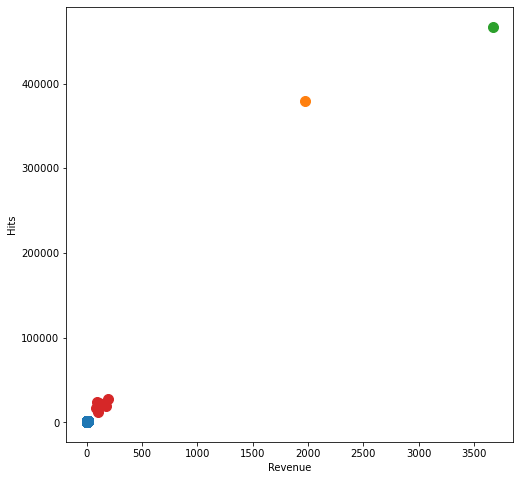

In [11]:
draw_scatter_cluster('Revenue', 'Hits', 4)